In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('tips.csv')

In [3]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [4]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [6]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [7]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [8]:
df.describe(include='object')

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [9]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [10]:
female_data=df[df['sex'] =='Female']

In [11]:
female_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
11,35.26,5.00,Female,No,Sun,Dinner,4
14,14.83,3.02,Female,No,Sun,Dinner,2
16,10.33,1.67,Female,No,Sun,Dinner,3


In [12]:
sum_of_total_bill_by_days = df.groupby('time')['total_bill'].sum().reset_index(name='count')

In [13]:
sum_of_total_bill_by_days

,time,count
0,Dinner,3660.30
1,Lunch,1167.47


In [14]:
non_smokers_male_customer = df[(df['sex'] =='male') & (df['smoker'] == 'no')]

In [15]:
def mape_of_size_label (size):
    if size ==1:
        return 'reglar'
    elif size ==2:
        return 'mediam'
    elif size ==3:
        return 'gold'
    else:
        return 'other'
    

In [16]:
df['type'] = df['size'].apply(mape_of_size_label)

In [17]:
df

,total_bill,tip,sex,smoker,day,time,size,type
0,16.99,1.01,Female,No,Sun,Dinner,2,mediam
1,10.34,1.66,Male,No,Sun,Dinner,3,gold
2,21.01,3.50,Male,No,Sun,Dinner,3,gold
3,23.68,3.31,Male,No,Sun,Dinner,2,mediam
4,24.59,3.61,Female,No,Sun,Dinner,4,other
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,gold
240,27.18,2.00,Female,Yes,Sat,Dinner,2,mediam
241,22.67,2.00,Male,Yes,Sat,Dinner,2,mediam
242,17.82,1.75,Male,No,Sat,Dinner,2,mediam


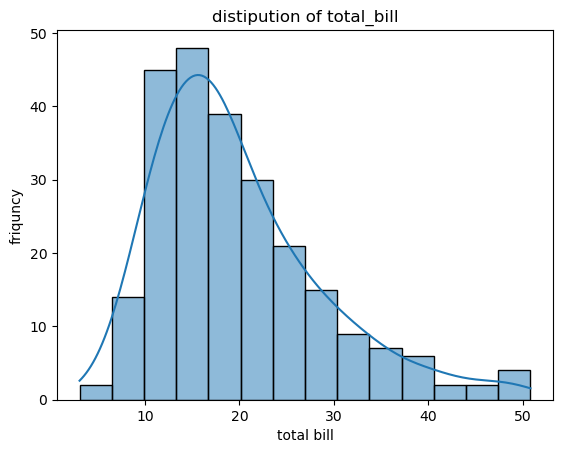

In [ ]:
plt.Figure(figsize=(8,6))
sns.histplot(df['total_bill'],kde=True)
plt.title('distipution of total_bill')
plt.xlabel('total bill')
plt.ylabel('friquncy')
plt.show()

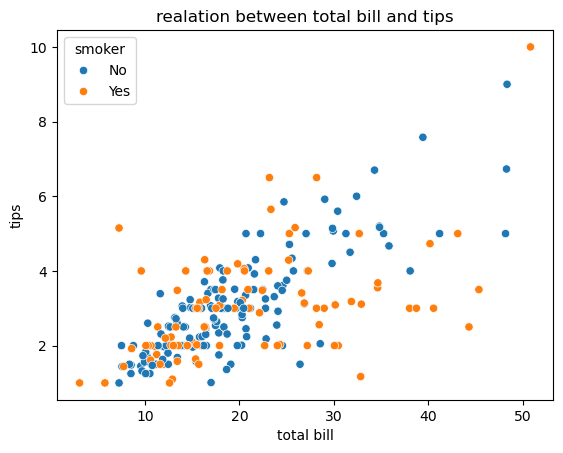

In [ ]:
plt.Figure(figsize=(8,6))
sns.scatterplot(data= df,x='total_bill',y='tip',hue='smoker')
plt.title('realation between total bill and tips')
plt.xlabel('total bill')
plt.ylabel('tips')
plt.show()

In [ ]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size', 'type'], dtype='object')

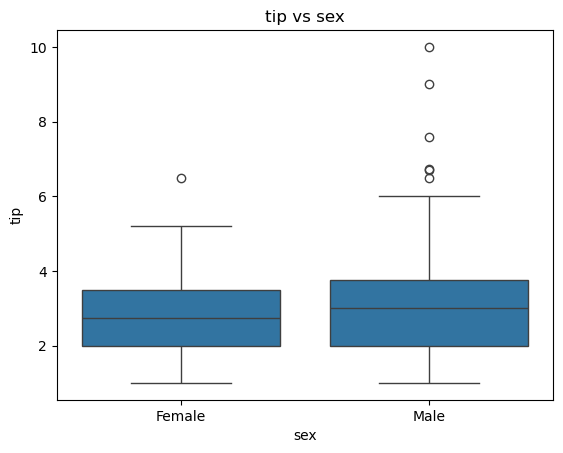

In [ ]:
plt.Figure(figsize=(8,6))
sns.boxplot(data= df, x='sex',y='tip')
plt.title('tip vs sex')
plt.xlabel('sex')
plt.ylabel('tip')
plt.show()

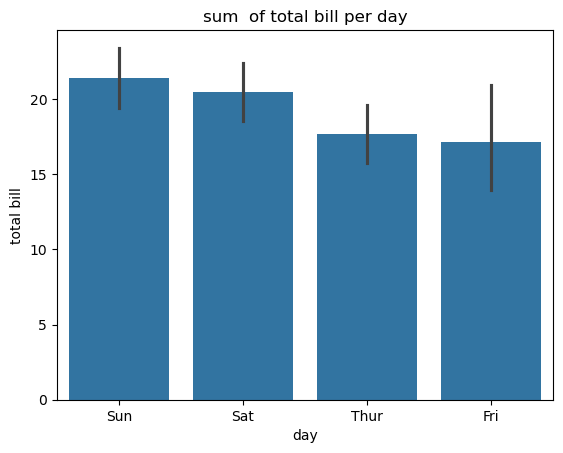

In [ ]:
plt.Figure(figsize=(8,6))
sns.barplot(data=df, x='day',y='total_bill')
plt.title('sum  of total bill per day')
plt.xlabel('day')
plt.ylabel('total bill')
plt.show()

In [ ]:
fig1 = px.scatter(df, x= 'total_bill', y='tip', title='relation betewwn total bil and tip',color='sex')
fig1